In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from salicon.salicon import SALICON
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import json
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Demo demonstrating the algorithm result formats for SALICON
# select results type for demo
print 'Running demo for saliency predicition results'

# set appropriate files for given type of results
dataDir='..'
dataType='train2014examples'
algo = 'fake'
annFile='%s/annotations/fixations_%s.json'%(dataDir,dataType)
resFile='%s/results/fixations_%s_%s_results.json'%(dataDir,dataType,algo)

Running demo for saliency predicition results


In [3]:
# initialize COCO ground truth and results api's
salicon = SALICON(annFile)
saliconRes = salicon.loadRes(resFile)

loading annotations into memory...
0:00:00.039639
creating index...
index created!
Loading and preparing results...     
DONE (t=0.00s)
creating index...
index created!


[123909, 123273, 123855, 123891, 123177, 123514, 123067, 123389, 123646, 123749]


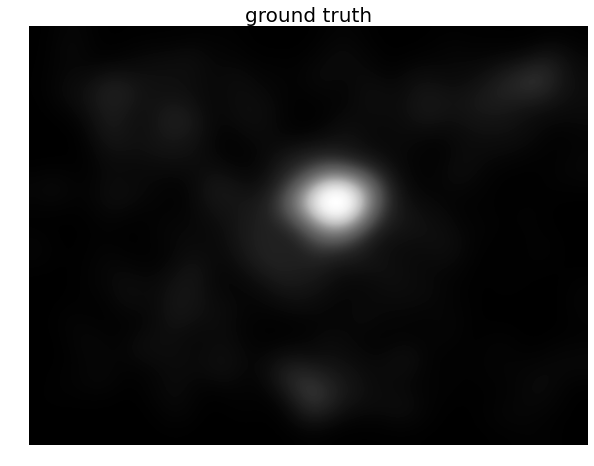

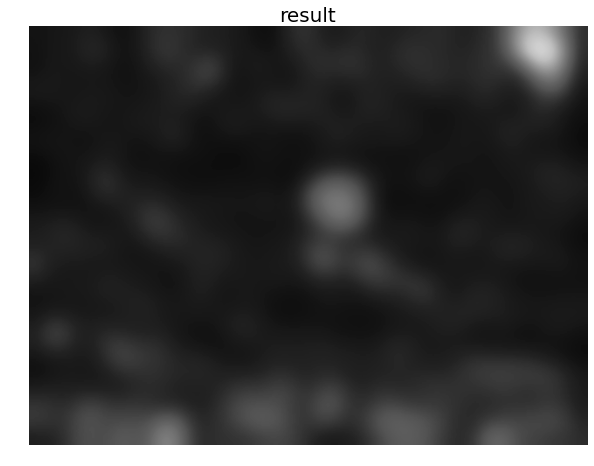

In [4]:
# visialuze ground truth and results side by side
imgIds = list(set([ann['image_id'] for ann in saliconRes.loadAnns(saliconRes.getAnnIds())]))
print imgIds
nImgs = len(imgIds)
imgId = imgIds[np.random.randint(nImgs)]
img = salicon.loadImgs(imgId)[0]
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))

# show ground truth labels
annIds = salicon.getAnnIds(imgIds=imgId)
anns = salicon.loadAnns(annIds)
plt.imshow(I)
salicon.showAnns(anns)
plt.title('ground truth', fontsize=20)
plt.axis('off')
plt.show()

# show result labels
annIds = saliconRes.getAnnIds(imgIds=imgId)
anns = saliconRes.loadAnns(annIds)
plt.imshow(I)
saliconRes.showAnns(anns)
plt.title('result', fontsize=20)
plt.axis('off')
plt.show()


In [5]:
# load raw JSON and show exact format for results
res = json.load(open(resFile))
print 'results structure have the following format:'
print res[0].keys()

# the following command can be used to save the results back to disk
# json.dump(res, open(resFile, 'w'))

results structure have the following format:
[u'image_id', u'saliency_map']
